Cities? 5
3 4
1 5
2 3
4 1
5 3
Best: [1, 2, 3, 4, 0, 1]
Length: 11.772699034745349


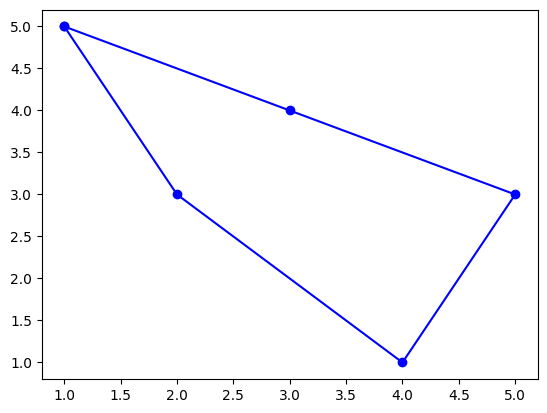

In [ ]:
import random, matplotlib.pyplot as plt

def dist(a, b): return ((a[0]-b[0])**2 + (a[1]-b[1])**2)**0.5

def tour(cities, pher):
    t = [random.randint(0, len(cities)-1)]
    while len(t) < len(cities):
        c = t[-1]
        left = [i for i in range(len(cities)) if i not in t]
        probs = [pher[c][j]/(dist(cities[c], cities[j])+0.01) for j in left]
        p = [x/sum(probs) for x in probs]
        t.append(random.choices(left, p)[0])
    t.append(t[0])
    return t

def update(pher, tours, cities):
    for i in range(len(cities)):
        for j in range(len(cities)): pher[i][j] *= 0.9
    for t in tours:
        d = sum(dist(cities[t[i]], cities[t[i+1]]) for i in range(len(t)-1))
        for i in range(len(t)-1):
            a, b = t[i], t[i+1]
            pher[a][b] += 1/d
            pher[b][a] += 1/d

def draw(t, c):
    x, y = [c[i][0] for i in t], [c[i][1] for i in t]
    plt.plot(x, y, 'bo-'); plt.show()

n = int(input("Cities? "))
c = [tuple(map(float, input().split())) for _ in range(n)]
pher = [[1]*n for _ in range(n)]
best, blen = [], 1e9

for _ in range(30):
    ts = [tour(c, pher) for _ in range(10)]
    for t in ts:
        d = sum(dist(c[t[i]], c[t[i+1]]) for i in range(len(t)-1))
        if d < blen: blen, best = d, t
    update(pher, ts, c)

print("Best:", best); print("Length:", blen)
draw(best, c)
